<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-torhec1234/blob/main/tecmty_regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


Nombre: Héctor Salvador Montañez Alvarez 

Matricula: A01332665 

Actividad Semanal -- 7 Regresiones y K means

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from math import isnan
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.inspection import permutation_importance

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

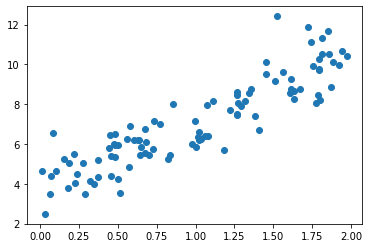

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

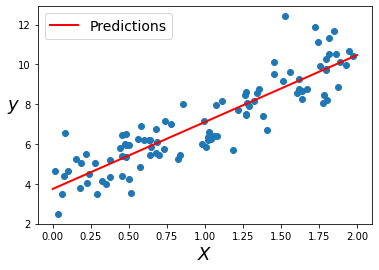

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

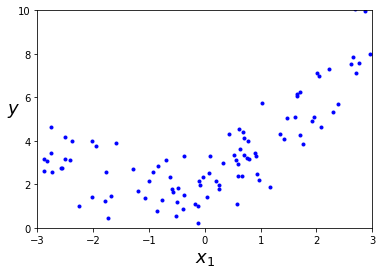

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.998940
1,4.320418
2,2.599923
3,2.175267
4,0.447174
...,...
95,0.565325
96,2.759217
97,3.314489
98,3.124415


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[-2.38324557e+00,  5.67985946e+00],
       [ 4.25427011e-01,  1.80988142e-01],
       [-2.88979418e+00,  8.35091039e+00],
       [-1.05861711e-01,  1.12067018e-02],
       [-1.73790252e+00,  3.02030517e+00],
       [-9.23900594e-01,  8.53592308e-01],
       [ 1.65482841e+00,  2.73845708e+00],
       [ 2.64742503e+00,  7.00885927e+00],
       [-2.56550237e+00,  6.58180240e+00],
       [ 2.05453236e-01,  4.22110321e-02],
       [ 2.29520091e+00,  5.26794724e+00],
       [-2.50494879e+00,  6.27476846e+00],
       [ 1.94708428e+00,  3.79113720e+00],
       [-8.53191894e-01,  7.27936409e-01],
       [-1.06743179e+00,  1.13941062e+00],
       [ 2.86479832e+00,  8.20706940e+00],
       [-1.79484546e+00,  3.22147023e+00],
       [ 1.15916364e+00,  1.34366036e+00],
       [ 1.92864437e+00,  3.71966910e+00],
       [-2.75289903e+00,  7.57845306e+00],
       [ 1.02231275e+00,  1.04512336e+00],
       [ 2.70929985e+00,  7.34030566e+00],
       [-2.25468020e+00,  5.08358280e+00],
       [ 2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[-2.38324557]
[5.67985946]


In [ ]:
X_poly[0]

array([-2.38324557,  5.67985946])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.89643337, 0.48819444]]), array([2.09460069]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

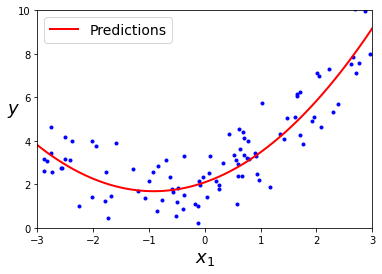

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
597,4.787700,33.916306
700,5.139742,38.849155
632,4.946467,36.827384
586,4.724777,35.449822
602,4.798105,40.280771
154,3.112526,35.130281
65,2.502705,44.442539
745,5.314816,29.963480
478,4.342330,30.460253
67,2.520240,61.879641


In [ ]:
x = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

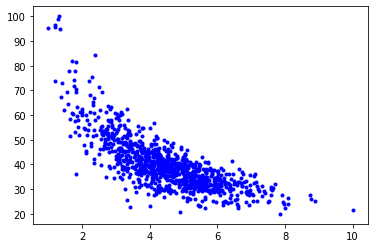

In [ ]:
plt.plot(X,y,'b.')

In [ ]:
#Definimos las funciones de error 
def mi_RMSE(y, y_pred):
  return np.sqrt(np.mean((y - y_pred)**2))

def mi_MAE(y, y_pred):
  return np.mean(np.abs(y - y_pred)) 

def mi_MAPE(y, y_pred):
  return np.mean(np.abs((y - y_pred)/y)) 

In [ ]:
#Definimos las funciones para graficar 
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()
    

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
  
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([0, 100])
    plt.ylabel('Price')
    plt.legend()

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# Primero hacemos la particion de los datos con una particion del 70% de entrenamiento y 30% de validacion
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
#lineal
lre=LinearRegression()
lre.fit(x_train[['Number of Units']], y_train)
yhat_train = lre.predict(x_train[['Number of Units']])
yhat_test = lre.predict(x_test[['Number of Units']])
lre.coef_, lre.intercept_

number of test samples : 300
number of training samples: 700


(array([-5.97986829]), 66.54024495702701)

Formula del modelo

$\hat{y} =  -5.9X + 66.54 $

In [ ]:
print('===============================\nLinear Regresion errors:\n===============================')
MAE_lin = metrics.mean_absolute_error(y_test, yhat_test)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_test)))
print('r2_score',r2_score(y_test, yhat_test))
R2_lin = r2_score(y_test, yhat_test)

Linear Regresion errors:
Error medio Absoluto (MAE): 5.102686032375684
Root Mean Squared Error: 7.255593260064403
r2_score 0.5733759051176386


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


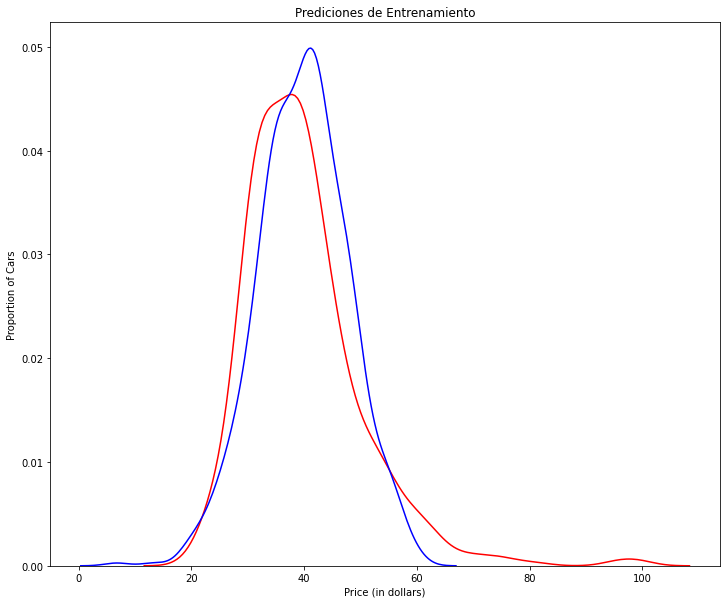

In [ ]:
Title = 'Prediciones de Entrenamiento'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:

print('------------------------------------------------')
print("R2 de Linear Regression Validacion :  ")
print(lre.score(x_test[['Number of Units']], y_test))
print('------------------------------------------------')
print("R2 de Linear Regression Entrenamiento :  ")
print(lre.score(x_train[['Number of Units']], y_train))
print('------------------------------------------------')



------------------------------------------------
R2 de Linear Regression Validacion :  
0.5733759051176386
------------------------------------------------
R2 de Linear Regression Entrenamiento :  
0.5799379678620462
------------------------------------------------


R2 de Linear Regression Validacion :  


In [ ]:
#polinomial
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['Number of Units']])
x_test_pr = pr.fit_transform(x_test[['Number of Units']])


In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat_test_pr = poly.predict(x_test_pr)
poly.coef_, poly.intercept_

(array([ 0.00000000e+00, -9.99368808e+01,  3.43468264e+01, -6.12888289e+00,
         5.36628450e-01, -1.81718668e-02]), 164.36773559093277)

Formula del modelo
$\hat{y} =  -99.9X + 34.3X^2 - 6.12X^3 + 0.53X^4 - 0.18X^5 + 164.36 $

> Bloc con sangría



In [ ]:
print('===============================\nPoly Regresion errors:\n===============================')
MAE_pol = metrics.mean_absolute_error(y_test, yhat_test_pr)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_test_pr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_test_pr)))
print('r2_score',r2_score(y_test, yhat_test_pr))
R2_pol = r2_score(y_test, yhat_test_pr)

Poly Regresion errors:
Error medio Absoluto (MAE): 4.463266521862756
Root Mean Squared Error: 5.938855314462864
r2_score 0.7141718408510866


In [ ]:
print('------------------------------------------------')
print("R2 de Linear Regression Validacion :  ")
print(poly.score(x_train_pr, y_train))
print('------------------------------------------------')
print("R2 de Linear Regression Entrenamiento :  ")
print(poly.score(x_test_pr, y_test))
print('------------------------------------------------')


------------------------------------------------
R2 de Linear Regression Validacion :  
0.6853027872477373
------------------------------------------------
R2 de Linear Regression Entrenamiento :  
0.7141718408510866
------------------------------------------------


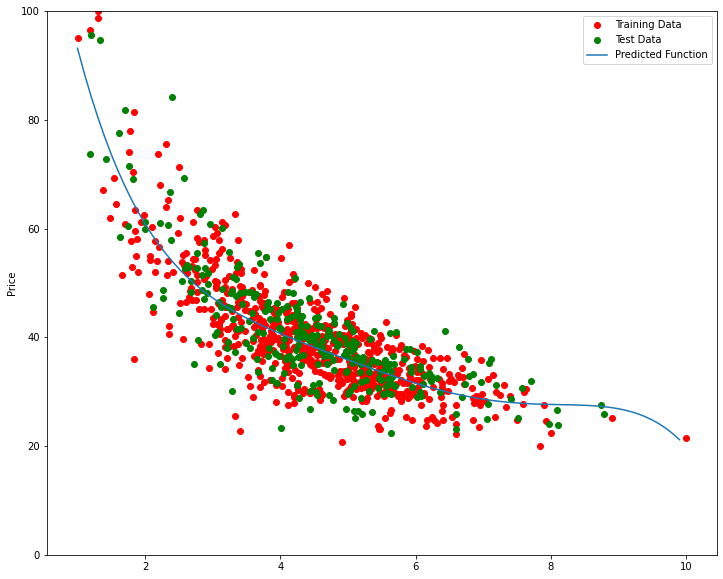

In [ ]:
PollyPlot(x_train[['Number of Units']], x_test[['Number of Units']], y_train, y_test, poly,pr)

In [ ]:
#Ridge 


In [ ]:
RR=Ridge()
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x[['Number of Units']], y)
BestRR=Grid1.best_estimator_
print('Best RR =',BestRR)
print('RR = ',BestRR.score(x_test[['Number of Units']], y_test))

Best RR = Ridge(alpha=1000)
RR =  0.4970205392255863


In [ ]:
ridge_reg = Ridge(alpha=1000, solver="cholesky")
ridge_reg.fit(x_train, y_train)
y_hat_test_rid = ridge_reg.predict(x_test)
print('===============================\nRidge Regresion errors:\n===============================')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_test_rid))
MAE_reg = metrics.mean_absolute_error(y_test, y_hat_test_rid)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_rid)))
print('r2_score',r2_score(y_test, y_hat_test_rid))
R2_reg = r2_score(y_test, y_hat_test_rid)

Ridge Regresion errors:
Error medio Absoluto (MAE): 5.454993281362264
Root Mean Squared Error: 8.254388226169043
r2_score 0.44783445328905647


In [ ]:
#Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
y_hat_test_las=lasso_reg.predict(x_test)
print('===============================\nLassoRegresion errors:\n===============================')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_test_las))
MAE_lass = metrics.mean_absolute_error(y_test, y_hat_test_las)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test_las)))
print('r2_score',r2_score(y_test, y_hat_test_las))
R2_lass = r2_score(y_test, y_hat_test_las)

LassoRegresion errors:
Error medio Absoluto (MAE): 5.081942359598079
Root Mean Squared Error: 7.229362201799107
r2_score 0.5764550668361736


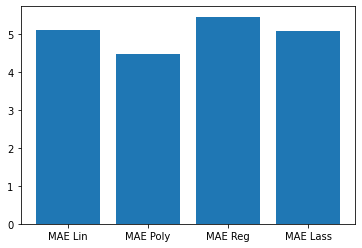

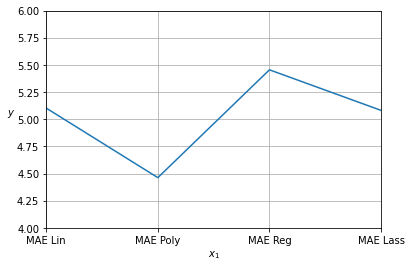

In [ ]:
MAE = [MAE_lin,MAE_pol,MAE_reg,MAE_lass]
plt.bar(['MAE Lin','MAE Poly','MAE Reg','MAE Lass'], MAE)
plt.show()


plt.figure(figsize=(6, 4))
plt.plot(['MAE Lin','MAE Poly','MAE Reg','MAE Lass'], MAE)
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 4, 6])
plt.grid()
plt.show()

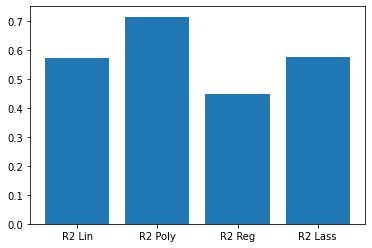

In [ ]:
R2_tot = [R2_lin,R2_pol,R2_reg,R2_lass]
plt.bar(['R2 Lin','R2 Poly','R2 Reg','R2 Lass'], R2_tot)
plt.show()

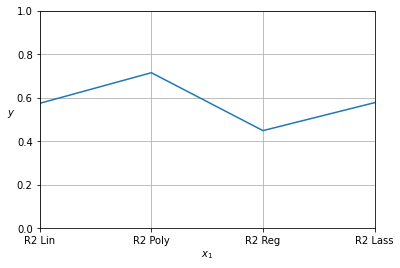

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(['R2 Lin','R2 Poly','R2 Reg','R2 Lass'], R2_tot)
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 1])
plt.grid()
plt.show()

RESULTADOS

Analizando los resultados obtenemos que el modelo que mejores resultados tiene es el polinomial de 5 orden, con valores. $\hat{y} =  -99.9X + 34.3X^2 - 6.12X^3 + 0.53X^4 - 0.18X^5 + 164.36 $

Se realizó una partición de 70-30 para entrenamiento y validación.  Es un error considerable de 4.46 pero con un r2 de 0.71% aun se puede mejorar el modelo. 




METODO ALTERNATIVO 

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
1227,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
18849,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,...,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
19369,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
20164,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,...,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
7139,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,...,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


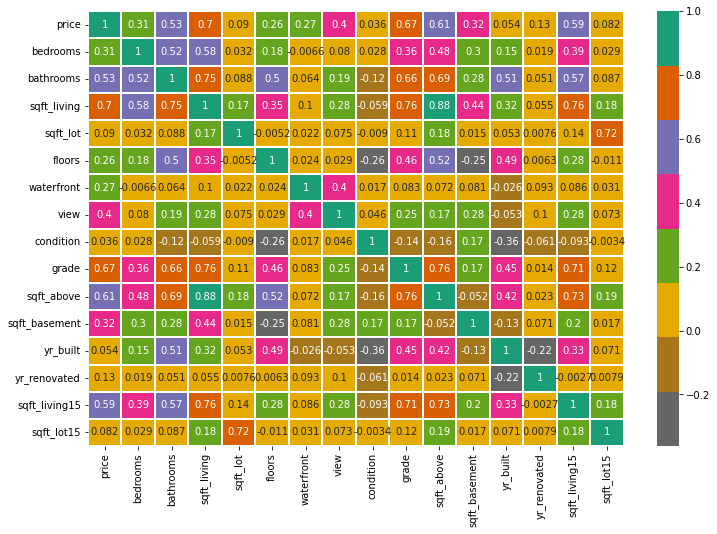

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y= df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [ ]:
#tu codigo aquí
columns_names = df.columns.values
columns_names

#columns_names.describe()
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#Definimos las variables con mayor correlacion
val_in = ['bathrooms','sqft_living','sqft_lot','grade']

In [ ]:
X_train.describe()
Y_train.describe()

,price
count,1.945100e+04
mean,5.391507e+05
std,3.636523e+05
min,7.500000e+04
25%,3.200000e+05
50%,4.500000e+05
75%,6.432025e+05
max,7.700000e+06


In [ ]:
#Linear regression

lr = LinearRegression()
lr.fit(X_train[val_in], Y_train)

yhat_test = lr.predict(X_test[val_in])
lr.coef_, lr.intercept_

(array([[-4.19621930e+04,  2.04905889e+02, -2.51911389e-01,
          1.03769075e+05]]),
 array([-588430.63651047]))

/var/folders/s4/dc8nfthn667dp0c64vlqhcm40000gn/T/ipykernel_64788/3408560890.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
/var/folders/s4/dc8nfthn667dp0c64vlqhcm40000gn/T/ipykernel_64788/3408560890.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

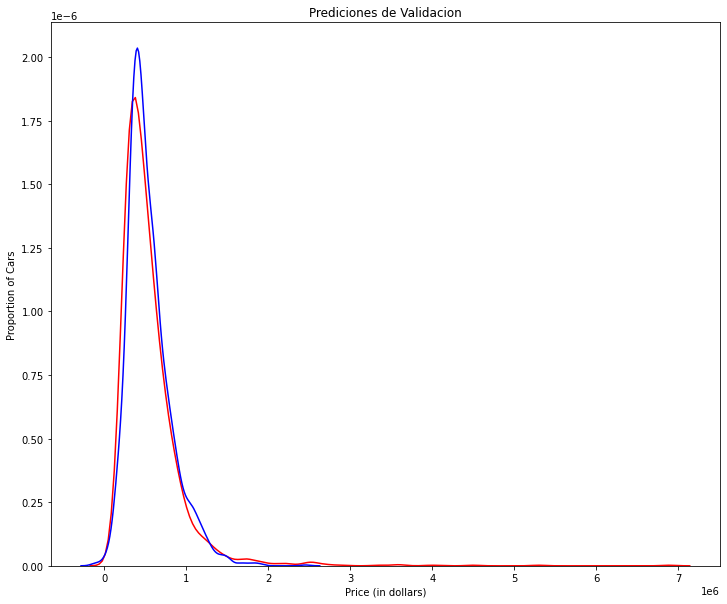

In [ ]:
Title = 'Prediciones de Validacion'
DistributionPlot(Y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:
print('===============================\nLinear Regresion errors:\n===============================')
MAE_lin = metrics.mean_absolute_error(Y_test, yhat_test)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(Y_test, yhat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, yhat_test)))
print('r2_score',r2_score(Y_test, yhat_test))
R2_lin = r2_score(Y_test, yhat_test)

Linear Regresion errors:
Error medio Absoluto (MAE): 161237.98443119985
Root Mean Squared Error: 268220.1046707093
r2_score 0.5433654527673574


In [ ]:
#Polinomial 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
pr = PolynomialFeatures(degree=5)
X_train_pr = pr.fit_transform(X_train[val_in])
X_test_pr = pr.fit_transform(X_test[val_in])



In [ ]:
poly = LinearRegression()
poly.fit(X_train_pr, X_train)
yhat_test_pr = poly.predict(X_test_pr)
poly.coef_, poly.intercept_


(array([[-5.13224161e-17, -6.39992076e-19,  5.60568623e-22, ...,
         -1.30749476e-18, -8.77426937e-23, -3.74267792e-27],
        [-1.18406699e-16, -4.47806843e-19,  3.37435766e-21, ...,
         -5.79715305e-20,  4.67504057e-23,  1.64111003e-26],
        [-1.79510132e-13, -1.97069724e-15,  4.07963378e-18, ...,
          2.43077371e-15,  3.94106644e-19,  5.24378622e-23],
        ...,
        [-5.51790932e-15,  3.45308784e-17, -1.67144211e-19, ...,
         -4.40572815e-16, -4.77047928e-20, -5.48996478e-24],
        [-1.03721729e-13, -1.48928291e-15,  6.34601367e-18, ...,
          4.88815549e-15,  6.25313075e-19,  7.10100920e-23],
        [ 2.93124329e-13, -5.60217528e-14,  6.08427973e-16, ...,
          3.36377202e-13,  4.00313121e-17,  3.68679878e-21]]),
 array([3.24623331e+00, 1.95443772e+00, 1.81372475e+03, 8.75379361e+03,
        1.45208441e+00, 4.23504109e-03, 1.68319970e-01, 3.41695884e+00,
        7.40998929e+00, 1.57372950e+03, 2.39995645e+02, 1.96868729e+03,
        7.924

In [ ]:
print(Y_test.count())
x_test_pr1 = pr.fit_transform(X_test[val_in])

price    2162
dtype: int64


In [ ]:
pr1 = PolynomialFeatures(degree=2)
x_train_pr1 = pr1.fit_transform(X_train[val_in])
x_test_pr1 = pr1.fit_transform(X_test[val_in])

In [ ]:
poly1 = LinearRegression()

poly1.fit(x_train_pr1, Y_train)
yhat1 = poly1.predict(x_test_pr1)


In [ ]:
metrics.mean_absolute_error(Y_test, yhat1)

148555.07735306752

In [ ]:
print('===============================\nPoly Regresion errors:\n===============================')
MAE_pol = metrics.mean_absolute_error(Y_test, yhat1)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(Y_test, yhat1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, yhat1)))
print('r2_score',r2_score(Y_test, yhat1))
R2_pol = r2_score(Y_test, yhat1)

Poly Regresion errors:
Error medio Absoluto (MAE): 148555.07735306752
Root Mean Squared Error: 230972.71144727676
r2_score 0.6613840153438677


/var/folders/s4/dc8nfthn667dp0c64vlqhcm40000gn/T/ipykernel_64788/3408560890.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
/var/folders/s4/dc8nfthn667dp0c64vlqhcm40000gn/T/ipykernel_64788/3408560890.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

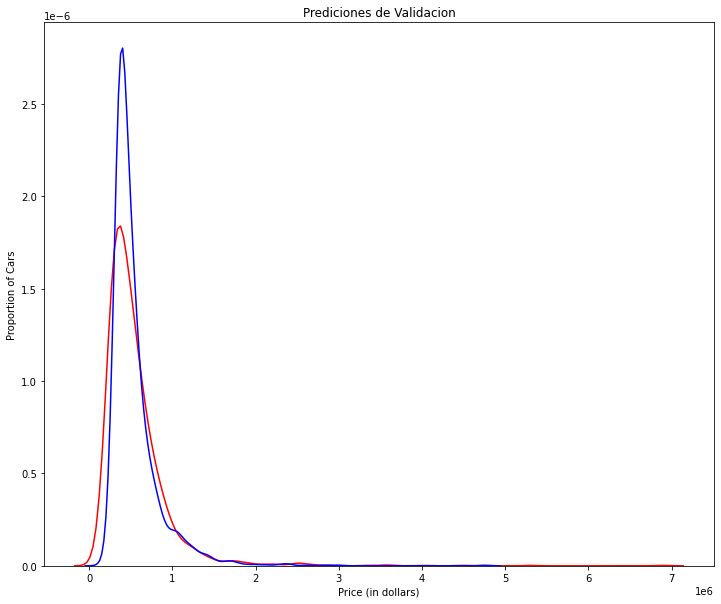

In [ ]:
Title = 'Prediciones de Validacion Poli'
DistributionPlot(Y_test, yhat1, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:
RR=Ridge()
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(X[val_in], y)
BestRR=Grid1.best_estimator_
print('Best RR =',BestRR)
print('RR = ',BestRR.score(X_test[val_in], Y_test))

Best RR = Ridge(alpha=10)
RR =  0.5445085449456


In [ ]:
#Ridge 

ridge_reg = Ridge(alpha=10, solver="cholesky")
ridge_reg.fit(X_train, Y_train)
y_hat_test_rid = ridge_reg.predict(X_test)
print('===============================\nRidge Regresion errors:\n===============================')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(Y_test, y_hat_test_rid))
MAE_reg = metrics.mean_absolute_error(Y_test, y_hat_test_rid)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_hat_test_rid)))
print('r2_score',r2_score(Y_test, y_hat_test_rid))
R2_reg = r2_score(Y_test, y_hat_test_rid)

Ridge Regresion errors:
Error medio Absoluto (MAE): 137585.199738372
Root Mean Squared Error: 232447.74672687985
r2_score 0.6570452743997186


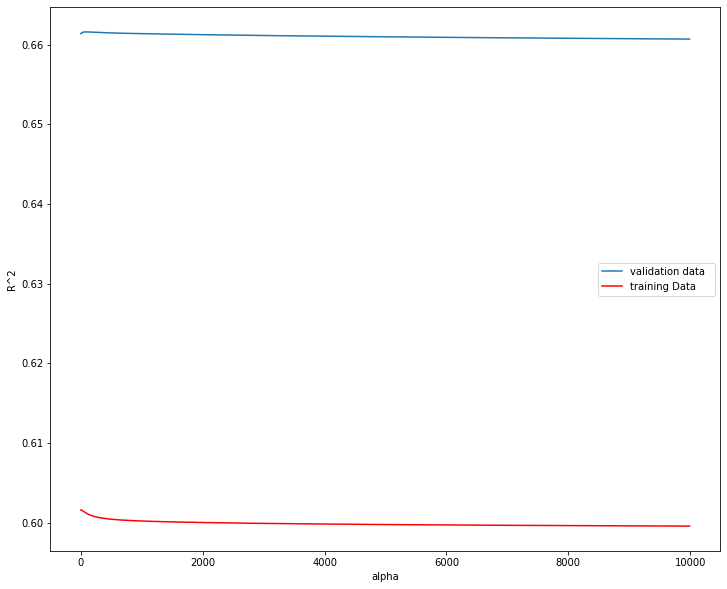

In [ ]:
#Test Score=0.661, Train Score=0.6
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [ ]:
#Lasso 

#Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
y_hat_test_las=lasso_reg.predict(X_test)
print('===============================\nLassoRegresion errors:\n===============================')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(Y_test, y_hat_test_las))
MAE_lass = metrics.mean_absolute_error(Y_test, y_hat_test_las)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_hat_test_las)))
print('r2_score',r2_score(Y_test, y_hat_test_las))
R2_lass = r2_score(Y_test, y_hat_test_las)

LassoRegresion errors:
Error medio Absoluto (MAE): 137777.93109490594
Root Mean Squared Error: 231025.66163897084
r2_score 0.6612287430056308


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.630e+14, tolerance: 2.913e+11
  model = cd_fast.enet_coordinate_descent(


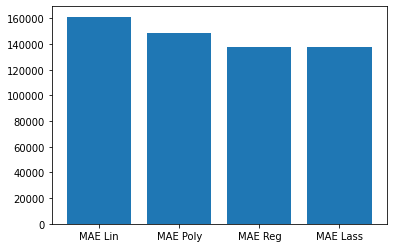

In [ ]:
MAE = [MAE_lin,MAE_pol,MAE_reg,MAE_lass]
plt.bar(['MAE Lin','MAE Poly','MAE Reg','MAE Lass'], MAE)
plt.show()




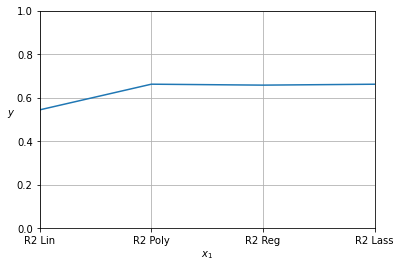

In [ ]:
R2_tot = [R2_lin,R2_pol,R2_reg,R2_lass]
plt.figure(figsize=(6, 4))
plt.plot(['R2 Lin','R2 Poly','R2 Reg','R2 Lass'], R2_tot)
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 1])
plt.grid()
plt.show()

In [ ]:
#Con estos resultafos podemos Observar que el metodo de Ridgge es el que menor error MAE y mayor R2 tiene entre los modelos probados. 
#En este ejemplo se utilizo una particion de 90% entrenamiento 10% validacion, se eligieron como variables de entrada a ['bathrooms', 'sqft_living', 'sqft_lot', 'grade']
#Por ser las variables que mayor correlaciion poseen. Los errores del metodo de Ridge son Error medio Absoluto (MAE): 137585.199738372
#oot Mean Squared Error: 232447.74672687985  que no resultados satisfactorios. Estas regressiones no son las adecuadas para trabajar con el caso.  


['bathrooms', 'sqft_living', 'sqft_lot', 'grade']
